https://pyecontech.com/2020/04/11/python_svm/

https://medium.com/@search.psop/python%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-16-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E4%B9%8Bsvm%E5%AF%A6%E4%BD%9C%E7%AF%87-719d98c68ce3

In [95]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [96]:
df = pd.read_excel('./default of credit card clients.xls', header=1)
df = df.drop(columns='ID')
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3

In [97]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_whole_ohe=onehotencoder.fit_transform(df[['SEX', 'MARRIAGE']]).toarray()
df_ohe = pd.DataFrame(data_whole_ohe, columns=['gender_male', 'gender_female', 'mairrage_married', 'mairrage_single', 'mairrage_others'])
df_c = pd.concat([df.drop(columns=['SEX', 'MARRIAGE']), df_ohe], axis=1)

In [98]:
x_df = df_c.drop(columns='default payment next month')
y_df = df_c[['default payment next month']]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df,test_size=0.2,random_state=0)

In [75]:
clf=svm.SVC(kernel='rbf',C=1,gamma='auto')
clf.fit(X_train,y_train)

C:\Anaconda3\envs\g6424\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, gamma='auto')

In [76]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.994
0.7838333333333334


In [78]:
#載入classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

#利用測試組資料來測試模型結果

predictions = clf.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[4684   19]
 [1278   19]]


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4703
           1       0.50      0.01      0.03      1297

    accuracy                           0.78      6000
   macro avg       0.64      0.51      0.45      6000
weighted avg       0.72      0.78      0.69      6000



In [5]:
#載入GridSearchCV
from sklearn.model_selection import GridSearchCV

#GridSearchCV是建立一個dictionary來組合要測試的參數
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC。重點是會創造一個新的estimator，但又表現得一模一樣，也就是estimator=SVC時，就是作為分類器
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多
grid = GridSearchCV(svm.SVC(), param_grid,verbose=3, n_jobs=10)

#利用剛剛設定的參數來找到最適合的模型
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Anaconda3\envs\g6424\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVC(), n_jobs=10,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [7]:
#顯示最佳estimator參數
grid.best_estimator_

SVC(C=10, gamma=0.001)

In [9]:
grid.score(X_test, y_test)

0.785

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
grid.score(X_test, y_test)
#評估新參考的預測結果好壞
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[4672   31]
 [1259   38]]


              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4703
           1       0.55      0.03      0.06      1297

    accuracy                           0.79      6000
   macro avg       0.67      0.51      0.47      6000
weighted avg       0.74      0.79      0.70      6000



In [134]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression(
    C=1
    , penalty='l1'
    , solver='liblinear'
    , random_state=900
    , class_weight = {0:0.1,1:0.9}
)
logmodel.fit(X_train,y_train)

#預測
#使用模型來預測
predictions = logmodel.predict(X_test)

#載入classificationo_report來看預測和實際值的差異，包含precision、recall、f1-score及support
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

C:\Anaconda3\envs\g6424\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.89      0.17      0.29      4703
           1       0.24      0.93      0.38      1297

    accuracy                           0.33      6000
   macro avg       0.56      0.55      0.33      6000
weighted avg       0.75      0.33      0.31      6000



In [138]:
#GridSearchCV是建立一個dictionary來組合要測試的參數
param_grid = {
    'C':[0.1,1,10,100,1000]
    , 'class_weight':[{0:0.1,1:0.9}, {0:0.2,1:0.8}, {0:0.3,1:0.7}, {0:0.4,1:0.6}, {0:0.1,1:0.9}, {0:0.5,1:0.5}]
}

#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC。重點是會創造一個新的estimator，但又表現得一模一樣，也就是estimator=SVC時，就是作為分類器
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多
grid = GridSearchCV(LogisticRegression(), param_grid,verbose=3, n_jobs=10,cv=10)

#利用剛剛設定的參數來找到最適合的模型
grid.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Anaconda3\envs\g6424\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Anaconda3\envs\g6424\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6},
                                          {0: 0.1, 1: 0.9}, {0: 0.5, 1: 0.5}]},
             verbose=3)

In [139]:
#顯示最佳estimator參數
grid.best_estimator_

LogisticRegression(C=1, class_weight={0: 0.4, 1: 0.6})

In [140]:
from sklearn.metrics import classification_report, confusion_matrix
grid.score(X_test, y_test)
#評估新參考的預測結果好壞
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[4672   31]
 [1259   38]]


              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4703
           1       0.55      0.03      0.06      1297

    accuracy                           0.79      6000
   macro avg       0.67      0.51      0.47      6000
weighted avg       0.74      0.79      0.70      6000



In [81]:
#利用confusion_matrix來看
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[4702,    1],
       [1297,    0]], dtype=int64)

https://yanwei-liu.medium.com/python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-%E5%85%AD-%E4%BD%BF%E7%94%A8scikit-learn%E5%BB%BA%E7%AB%8B%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-af13a493f36d

In [37]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)

C:\Anaconda3\envs\g6424\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=1000, random_state=42)

In [42]:
print(rf.score(X_train,y_train))
print(rf.score(X_test, y_test))

0.8894239988784666
0.20094490650374175


In [38]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test.to_numpy())
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.35 degrees.


In [39]:
# Get numerical feature importances
feature_list = list(x_df.columns)
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PAY_0                Importance: 0.16
Variable: AGE                  Importance: 0.07
Variable: LIMIT_BAL            Importance: 0.06
Variable: BILL_AMT1            Importance: 0.06
Variable: BILL_AMT2            Importance: 0.05
Variable: BILL_AMT6            Importance: 0.05
Variable: PAY_AMT1             Importance: 0.05
Variable: PAY_AMT2             Importance: 0.05
Variable: PAY_AMT3             Importance: 0.05
Variable: PAY_AMT5             Importance: 0.05
Variable: PAY_AMT6             Importance: 0.05
Variable: PAY_2                Importance: 0.04
Variable: BILL_AMT3            Importance: 0.04
Variable: BILL_AMT4            Importance: 0.04
Variable: BILL_AMT5            Importance: 0.04
Variable: PAY_AMT4             Importance: 0.04
Variable: EDUCATION            Importance: 0.02
Variable: SEX                  Importance: 0.01
Variable: MARRIAGE             Importance: 0.01
Variable: PAY_3                Importance: 0.01
Variable: PAY_4                Importanc

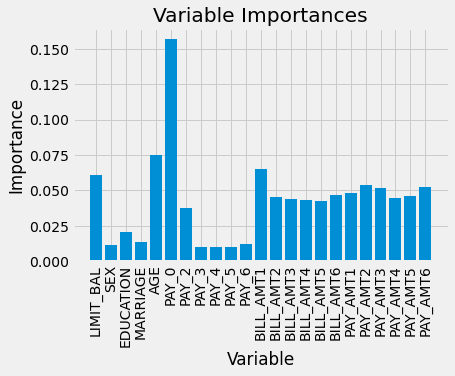

In [40]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [41]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('PAY_0'), feature_list.index('BILL_AMT1')]
train_important = X_train.to_numpy()[:, important_indices]
test_important = X_test.to_numpy()[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test.to_numpy())
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

C:\Anaconda3\envs\g6424\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 0.34 degrees.


In [43]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

C:\Anaconda3\envs\g6424\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=3, n_estimators=10)

In [45]:
print(rf_small.score(X_train,y_train))
print(rf_small.score(X_test, y_test))

0.20148828799303786
0.20839024139887674
